<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/3/3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.4 Support Vector Classificationを用いたクラス分類
- 目的
    - Support Vector Classificationの実験を行う
- 参考
    - 本コードは以下のサイトを参考にしました
    - http://neuro-educator.com/ml3/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, metrics, preprocessing, model_selection
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [2]:
# Wineのデータセットを読み込む
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']
display(pd.DataFrame(df_wine))

,class,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735
...,...,...,...
173,3,7.70,740
174,3,7.30,750
175,3,10.20,835
176,3,9.30,840


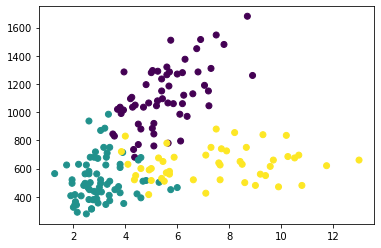

In [3]:
plt.scatter(df_wine["color"], df_wine["proline"], c=df_wine["class"]-1)
plt.show()

In [4]:
# データの整形
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_std=sc.transform(X)
z = df_wine["class"]-1

In [5]:
# Support Vector Classificationを用いた学習
clf_result=svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0)#loss='squared_hinge' #loss="hinge", loss="log"
clf_result.fit(X_std, z)

LinearSVC(class_weight='balanced', loss='hinge', random_state=0)

In [6]:
# トレーニングデータとテストデータに分けて実行してみる
X_train, X_test, train_label, test_label=model_selection.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)

# 正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

正答率 =  0.9444444444444444


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


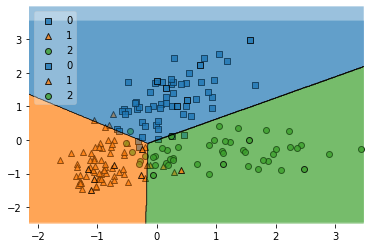

In [7]:
# データをプロット
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット
plt.show()